# H->gg diphoton ID MVA adversarial training

## Setup

In [1]:
import keras.models
import os, sys
from import_file import import_file
io = import_file("../utils/io.py")

Using TensorFlow backend.


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font',**{'family':'sans-serif', 'sans-serif':['Helvetica'], 'size':'20'})
plt.rcParams['figure.figsize'] = '10,10'
plt.style.use('seaborn-white')

## Pretraining checks

### Load pretrained CLF and DSC:

In [13]:
base_dir = '/scratch/spigazzi/diphotonID/'

pretrain_clf = io.read_data(base_dir+'AN_output_v4/pretrain/clf_metrics_kfold-1.csv')
pretrain_clf.rename( columns={'Unnamed: 0':'epoch'}, inplace=True )

pretrain_dsc = io.read_data(base_dir+'AN_output_v4/pretrain/dsc_metrics_kfold-1.csv')
pretrain_dsc.rename( columns={'Unnamed: 0':'epoch'}, inplace=True )

## Adversarial training checks

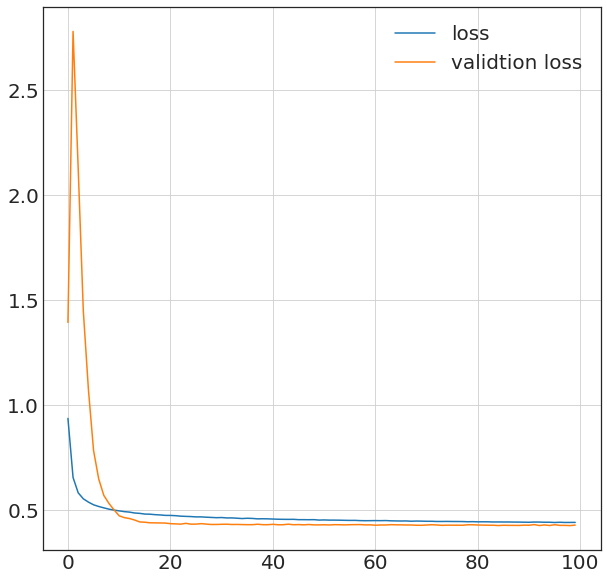

In [21]:
graphs = plt.plot(pretrain_dsc['epoch'], pretrain_dsc[['loss','val_loss']])
plt.legend(iter(graphs), ('loss','validtion loss'))
plt.grid()

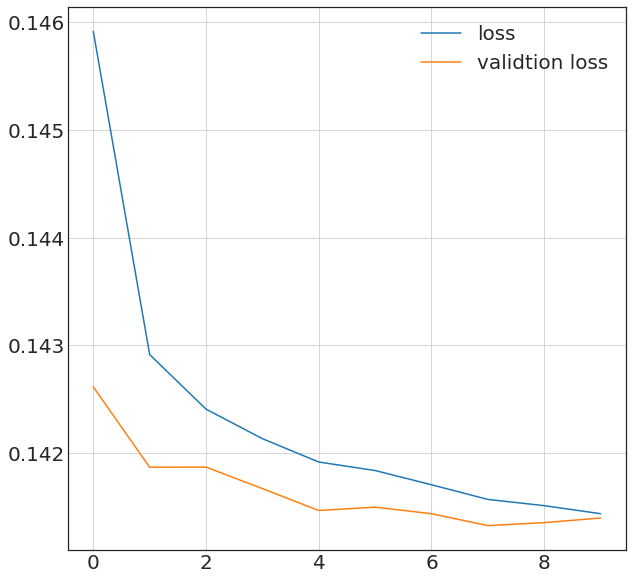

In [22]:
graphs = plt.plot(pretrain_clf['epoch'], pretrain_clf[['loss','val_loss']])
plt.legend(iter(graphs), ('loss','validtion loss'))
plt.grid()

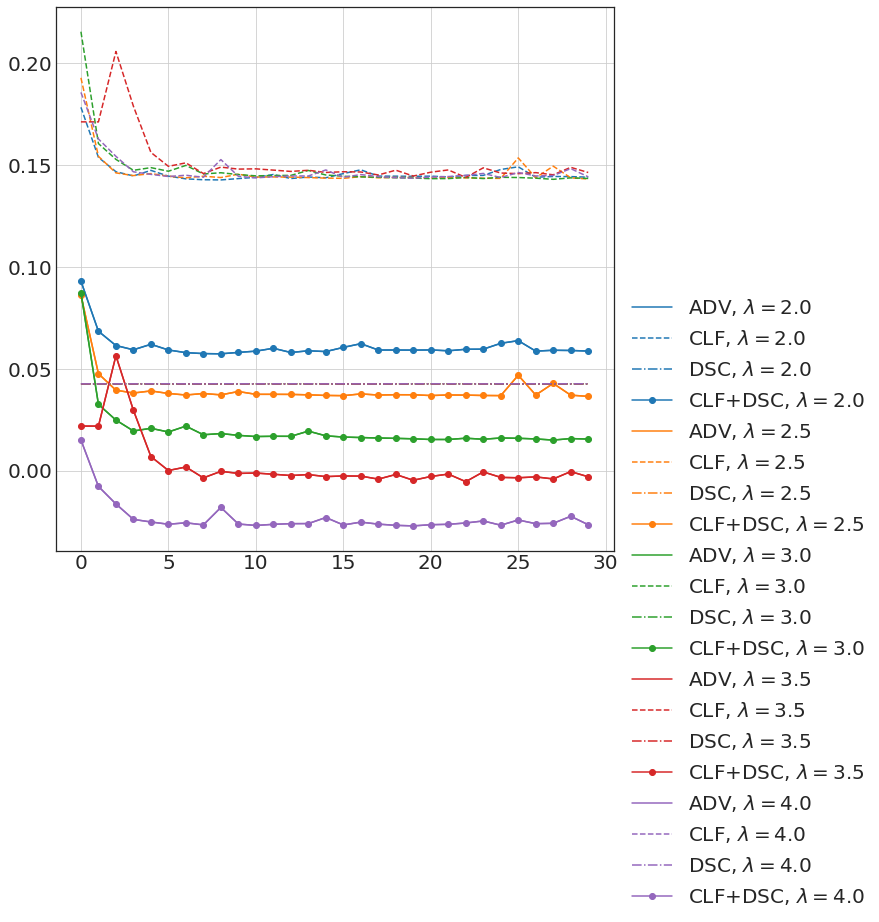

In [36]:
training_res = {}
#for lambd in ['0.1', '0.25', '0.5', '0.75', '1.0']:
for lambd in ['2.0', '2.5', '3.0', '3.5', '4.0']:
   training_res[lambd] = io.read_data(base_dir+'AN_output_v7/lambda_'+lambd+'/pivot_metrics.csv')
   training_res[lambd].rename( columns={'Unnamed: 0':'epoch'}, inplace=True )

for lambd in ['2.0', '2.5', '3.0', '3.5', '4.0']:
    adv_loss_plt = plt.plot(training_res[lambd]['epoch'], training_res[lambd]['adv_loss_valid'], label='ADV, $\lambda='+lambd+'$')
    plt.plot(training_res[lambd]['epoch'], training_res[lambd]['adv_clf_loss_valid'], label='CLF, $\lambda='+lambd+'$', linestyle='--', color=adv_loss_plt[-1].get_color())
    plt.plot(training_res[lambd]['epoch'], training_res[lambd]['adv_dsc_loss_valid'], label='DSC, $\lambda='+lambd+'$', linestyle='-.', color=adv_loss_plt[-1].get_color())    
    plt.plot(training_res[lambd]['epoch'], training_res[lambd]['adv_clf_loss_valid']-float(lambd)*training_res[lambd]['adv_dsc_loss_valid'], label='CLF+DSC, $\lambda='+lambd+'$', marker='o', color=adv_loss_plt[-1].get_color())


plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
